In [1]:
from IPython.display import Image
img = 'Logo.png' 
Image(url=img, width=800, height=100)

# Introduction

In March 2016, the 47th session of the United Nations (UN) Statistical Commission was organized to develop a framework to conquer the biggest global challenges of the world. During this session the global indicator framework was developed by the Inter-Agency and Expert Group on Sustainable Development Goal Indicators (IAEG-SDGs) and agreed to as possible working tool (DESA, 2018). 

This framework include “The Sustainable Development Goals”, which are the blueprint to achieve a better and sustainable future for every individual worldwide. The blueprint include 17 goals that cover the global challenges and are interrelated. The main goal is to leave no individual behind. The formulation of several sub-goals within these 17 goals provide specific targets. These targets must be achieved by 2030 (United Nations, 2018). 

Every year, the status of progression considering the goals is reviewed according to the most up to date data available. The highlights of these data considering progression and remaining gaps were reported in  “The Sustainable Development Goals Report 2018”. In addition the interconnections across goals and targets are examined. In the report of 2018 the main conclusion was that people worldwide have a higher quality of life compared with a decade ago. However, the process on targets to make sure that no individual is left behind is lacking to meet the targets of 2030, which is a  disturbing conclusion (United Nations, 2018b).

One of these target goals is about gender equality. Goal five wants to end all forms of discrimination against women and girls. This is not only a basic human right but will also help drive up economic growth and development across the boards (UNDP, 2018). There are still huge inequalities between men and women.

Globally, women earn only 77 cents for every dollar a man earns for doing the same work, less than 20% of the world's landholders are women, 7 in 10 women in the world experience physical and/or sexual violence at some point in their life’s and only 22.8% of all national parliamentarians were woman in 2016. However,  that's not all, still 750 million women and girls who are alive today were married before their 18th birthday (UNDP, 2018).

Child marriage is the third sub-goal of the gender equality goal. it states: *"Eliminate all harmful practices such as child, early and forced marriage and female genital mutilation"*

The target is to bring the proportion of women aged 20-24 years who were married or in a union before age 15 and before age 18 to zero (DESA, 2018). 193 countries now, have agreed to end child marriage by 2030. Until than 12 million girls are married before their 18th birthday every year (Girls not Brides, 2018).

This target has not only effect on the gender equality target goal, but it is also represented in seven other goals. Child marriage also influences goal one: no poverty, goal two: zero hunger, goal three: good health and wellbeing, goal four: inclusive and quality education, goal eight: economic growth, goal ten: reduce inequalities and goal 16: peace, justice and strong institutions (Girls not Brides, 2018). If child marriage is not eliminated, these goals will not be achieved.

Concluded that child marriage has to end, will it actually help to reach gender equality? This research paper will analyse the different goals and assess if there is a correlation between child marriage and the aforementioned  inequalities. The research question will be: *" Will ending child marriage contribute to gender equality"?*

STRUCTURE OF THE PAGE AND SUBQUESTIONS

# General functions and code

Before the data can be analysed, there are some general steps to be taken. Because these things are necessary in multiple questions and lines of code, these functions are made and listed beneath. In the chapters the needed function will be called and a reference to the general function will be given. 

First all needed libraries are called, then the additional used data from another source than World Bank is described and last the functions are created.

In [2]:
#All necessary libraries 

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wbdata
import json
import requests
import pycountry
from scipy import stats
from bs4 import BeautifulSoup
import seaborn as sns

For this research, the data from the World Bank (wbdata) wasn't sufficient to analyse our sub-questions. Because of this data from the Organisation for Economic Cooperation and Development(OECD) databank is used. Beneath a short explanation of how the necessary data frame is created will be given.

The website BeautifulSoup is used to retrieve additional data from the website of OECD. Next, List comprehension and 'soup.find_all' is used to create lists in order to make a data frame. After that a new list is made with the countries from old list: 'list_country' but with converted ISO-two digit country code to ISO-three digit country code.
After this the  data frame can be created. Last, the type of the column 'value' is changed into a float and  added a more clear value to the column 'indicator'. Also the value in the column "value" is multiplied by 100 to show the percentage and to make it comparable with the data from the World Bank.

In [3]:
#Step 1: retrieving additional data
response = requests.get('https://stats.oecd.org/restsdmx/sdmx.ashx/GetData/GIDDB2014/ALL.AUS+AUT+BEL+CAN+CHL+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA+NMEC+AFG+ALB+DZA+AGO+ARG+ARM+AZE+BHR+BGD+BLR+BEN+BTN+BOL+BIH+BWA+BRA+BGR+BFA+BDI+KHM+CMR+CAF+TCD+CHN+COL+COG+COD+CRI+CIV+HRV+CUB+CYP+DOM+ECU+EGY+SLV+GNQ+ERI+ETH+FJI+MKD+GAB+GMB+GEO+GHA+GTM+GIN+GNB+HTI+HND+HKG+IND+IDN+IRN+IRQ+JAM+JOR+KAZ+KEN+PRK+KWT+KGZ+LAO+LBN+LSO+LBR+LBY+MDG+MWI+MYS+MLI+MRT+MUS+MDA+MNG+MAR+MOZ+MMR+NAM+NPL+NIC+NER+NGA+PSE+OMN+PAK+PAN+PNG+PRY+PER+PHL+QAT+ROU+RUS+RWA+SAU+SEN+SRB+SLE+SGP+SOM+ZAF+LKA+SDN+SWZ+SYR+TJK+TZA+THA+TLS+TGO+TTO+TUN+TKM+UGA+UKR+ARE+URY+UZB+VEN+VNM+YEM+ZMB+ZWE.AIC.FC_2/all?startTime=2014&endTime=2014')
data = response.content
soup = BeautifulSoup(data, "lxml")
#print(soup)

#Step 2: Lists are created to make a dataframe
list_country = [x.get_attribute_list('value')[0] for x in soup.find_all("value", attrs={ "concept" : "LOCATION"})]
list_date = [x.text for x in soup.find_all("time")]
list_variable = [x.get_attribute_list('value')[0] for x in soup.find_all("value", attrs={ "concept" : "VAR"})]
list_value = [x.get_attribute_list('value')[0] for x in soup.find_all("obsvalue", attrs={ "value" : True})]

#Step 3: ISO-two digit countrycode convertion to ISO-three digit country code
new_countrylist = [ pycountry.countries.get(alpha_3=i).alpha_2 for i in list_country ]
# new_countrylist

#Step 4: Creating dataframe
OECD_df = pd.DataFrame({'country':new_countrylist,'date':list_date,'indicator':list_variable, 'value':list_value})
# OECD_df

#Step 5: Changing column values
OECD_df['value'] = OECD_df.value.astype(float).round(6)
OECD_df['value'] = OECD_df['value'] *100
OECD_df['indicator']= 'Percentage of women married between 15-19 years of age'  
# OECD_df

This function is for cleaning the data from the world Bank datasets. A data frame is created, the data in this frame will be cleaned. Then the earlier determined 15 countries with the worst Gender equality rate are filtered from the data frame, combined with the years 2007 till 2017. Last the data frame will be sorted from worst to less bad and the missing data is filled in. 

In [4]:
def clean(indicator):
    #create data frame
    name = pd.DataFrame(wbdata.get_data(indicator))
    
    #clean the date
    name['country_code'] = name.country.astype(str).str.slice(8,10)
    name['country'] = name.country.astype(str).str.slice(23,-2)
    name['indicator'] = name.indicator.astype(str).str.slice(35,-2)
    name["date"] = name["date"].astype(int) 
    name["value"] = name["value"].astype(float).round(2)
    return name

In [5]:
def fillna(name):
    for i in name.country.unique():
        name.loc[name['country'] == i]  = name.loc[(name['country'] == i)].fillna(method='ffill')
    return name

This function is for making a line plot of certain dataframes. 

In [6]:
def graph(dataframe, title_graph, x_label, y_label):
    # Visualising changes over time per indicator

    fig,ax = plt.subplots(figsize=(30, 15))

    for name in dataframe["country"].unique():
        ax.plot(dataframe[dataframe.country==name].date,dataframe[dataframe.country==name].value,label=name)

    #change size and location of legend
    ax.legend(loc=(1.1, 0.2), fontsize = 'xx-large')

    #values of the x and y axis
    plt.xticks(rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)

    #labels of the x and y axis 
    plt.title(title_graph, fontsize = 30)
    plt.xlabel(x_label, fontsize = 25)
    plt.ylabel(y_label, fontsize = 25)

In [7]:
def makeScatter(x, y, title ='', xlabel = '', ylabel = ''):
    plt.figure(figsize=(20,10))
    
    #plot the scatter with line
    sns.regplot(x,y, color = 'orchid')
    
    #labels
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize = 20)
    plt.title(title, fontsize = 25)
    plt.xticks(rotation = 65, fontsize = 15)
    plt.yticks(fontsize = 15)

In [8]:
def makeBarPlot(dataframe, title_graph = "", xlabel = "", ylabel = ""):
    #make array from the columns of the dataframe
    array1 = dataframe.country.values
    array2 = dataframe.value_y.values
    
    # colors for the bars
    colors = ["Red", "Blue", "Yellow", "Green", "Pink", "Cyan"]
    
    # set the cells that contain missing values at zero
    array2[np.isnan(array2)] = 0
    
    # plot the bar
    plt.figure(figsize=(30,10))
    plt.bar(array1, array2, color = colors, width = 0.8, align='center')

    plt.xticks(np.arange( len(array1) ), array1, rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)
    
    # labels
    plt.title(title_graph, fontsize = 30)
    plt.xlabel(xlabel, fontsize = 25)
    plt.ylabel(ylabel, fontsize = 25)
    
    # Get the value of the bar on top of the bar
    for (i, value) in enumerate (array2):
        plt.text(i- 0.4 , value + 2, "%.2f" % (value) , fontsize = 20)
        

In [9]:
def getYears15(name):
    name.date = name.date.astype(int)
    years = name.loc[(name['date'] >= 2007) & (name['date'] <= 2017)]

    years_worst = years.loc[(years.country.isin(CPIA_worst15.country)),:]
    years_worst_sorted = years_worst.sort_values(by='date',ascending=True)
    
    return years_worst_sorted

# Sub question 1: Gender Equality

Gender equality rate van alle landen
Introductie wat er in dataset staat.

Visualiseren:
- World map
- Histogram

De gemiddelde gender equality rate van elk jaar berekenen en die plotten. Vervolgens die lijn extrapoleren om te kijken of het doel in 2030 wordt gehaald. 

Subconclusion gender equality rate
 --> omdat alle landen teveel is om verder te analyseren, nemen we alleen de 15 landen die het slechtste scoren. 

In [10]:
CPIA_all = clean("IQ.CPA.GNDR.XQ")
#CPIA_all = fillna(CPIA_all)

# Filter the dataset on year and on country code which are not numeric
CPIA_all_year_alpha = CPIA_all.loc[(CPIA_all['date'] == 2017) & (CPIA_all.country_code.str.isalpha())]
CPIA_OnlyCountries = CPIA_all_year_alpha[17:]

#sort the countries by 'value' (their rating) and only show the Top 15
CPIA_worst15 = CPIA_OnlyCountries.sort_values(by='value', ascending=True)[:15]

# Sub question 2: GDP
Intro

Correlatie tussen GDP en gender equality rate analyseren met behulp van een scatterplot

Bar plot van de GDP waarde van 2017 van de 15 slechtste landen. 
(hier is ook nog missing data, maar niet zeker hoe ik hier mee om ga). 

Grafiek van de verandering in GDP over de jaren heen. 

subconclusion

In [11]:
# Make a dataframe from the GDP data
GDP_all = clean("NY.GDP.PCAP.CD")
GDP_all = fillna(GDP_all)

# Make the value in the column "date" a string
GDP_all["date"] = GDP_all.date.astype(str)
CPIA_worst15["date"] = CPIA_worst15["date"].astype(str)

#### Correlation between GDP and gender equality rate

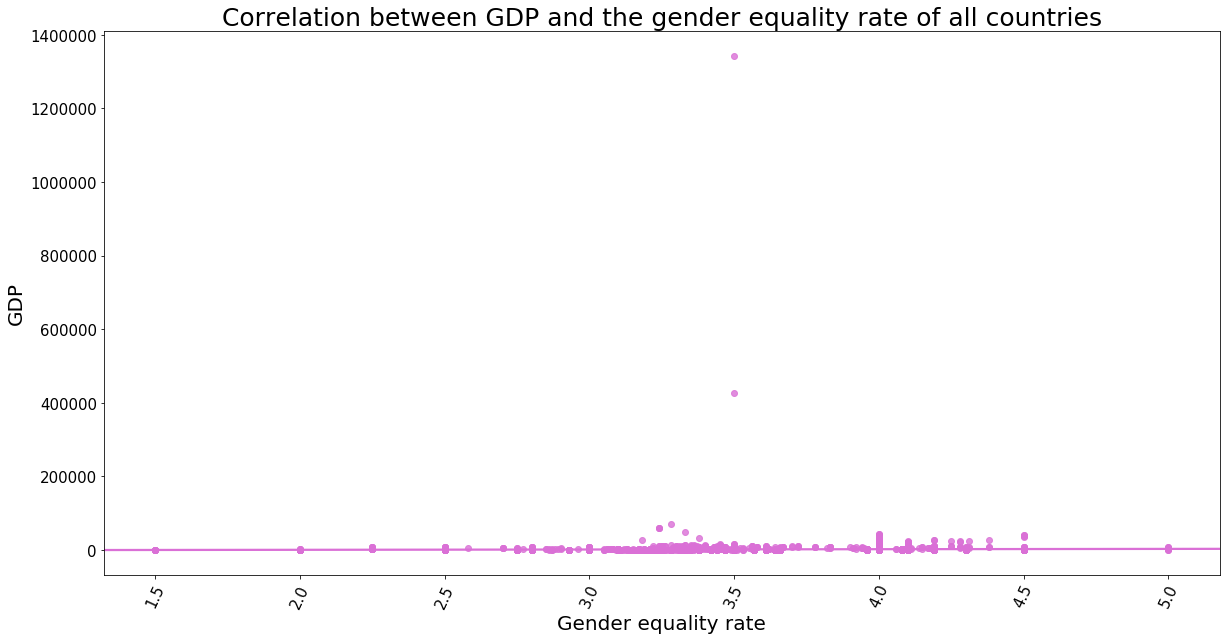

In [12]:
makeScatter(CPIA_all['value'],GDP_all['value'], "Correlation between GDP and the gender equality rate of all countries",
            'Gender equality rate', "GDP")

In [13]:
# Make a dataframe which contains the most recent values of GDP of every country

GDP_now = GDP_all.sort_values("date", ascending = False).drop_duplicates(["country"])

# Make a new dataframe of the 15 countries with the worst equality rating in combination with the GDP data
GDP_worst15 = pd.merge( CPIA_worst15, GDP_now, how = "left", left_on = ["country", "date"], right_on = ["country", "date"])

# missing data!

#### Plot the GDP of the 15 worst countries

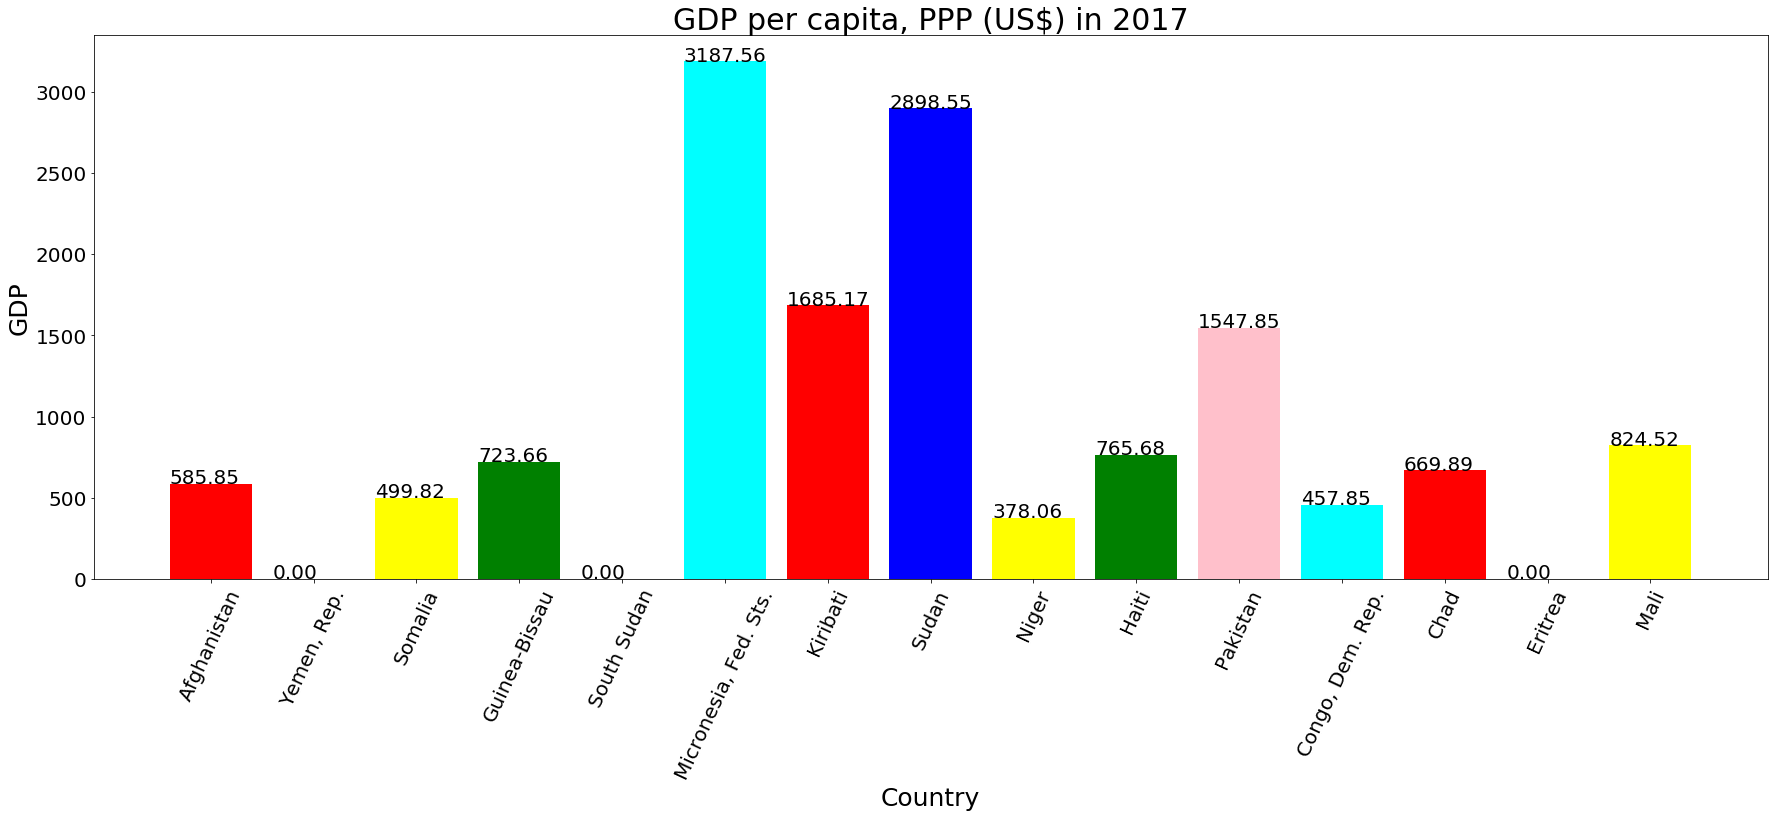

In [14]:
makeBarPlot(GDP_worst15, "GDP per capita, PPP (US$) in 2017", "Country", "GDP")

#### Make a graph of the change in GDP over the years of the 15 countries

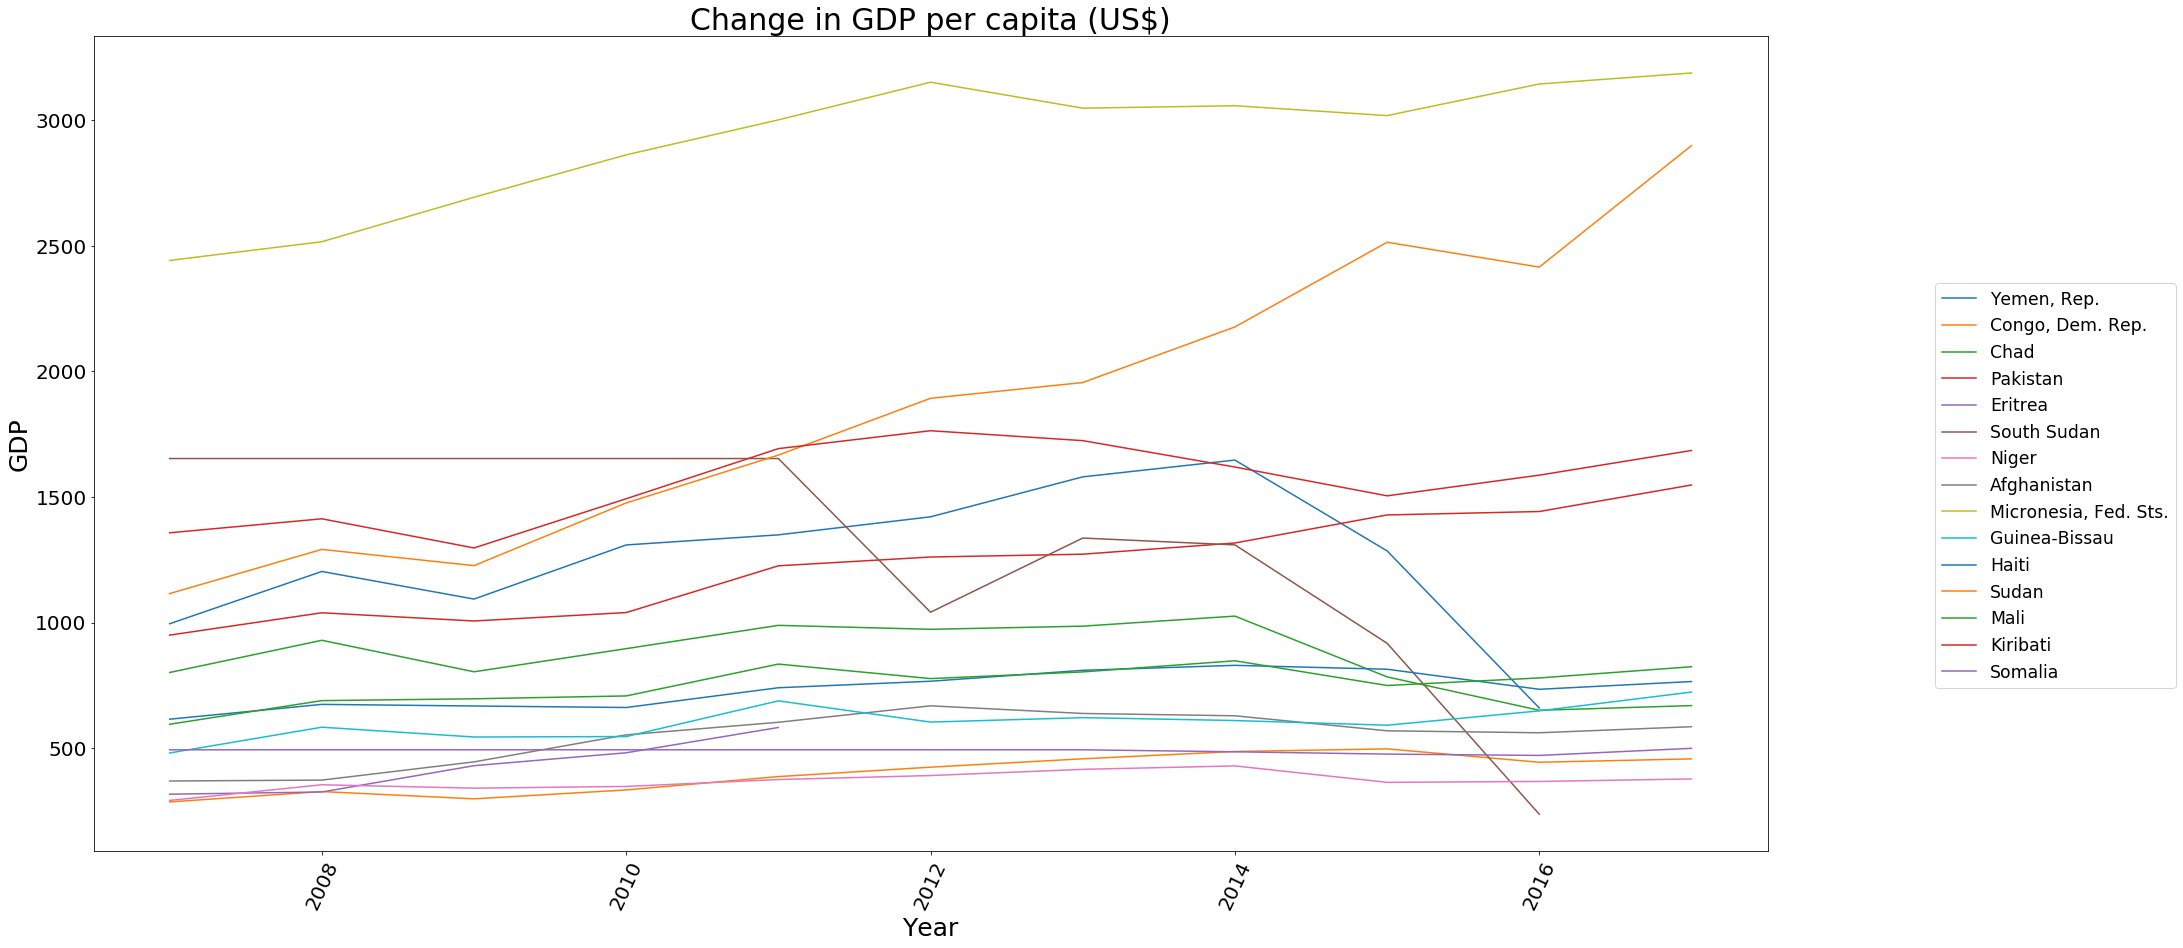

In [15]:
# Create the dataframe of the GDP of the 15 countries over the years 2007 till 2017
GDP_years = getYears15(GDP_all)

# Plot this
graph(GDP_years, "Change in GDP per capita (US$)", "Year", "GDP")

# Sub question 3: Child marriages

Intro

Correlatie tussen child marriages en gender equality rate analyseren met behulp van een scatterplot

Aangezien er veel missing data is uit het jaar 2017 zal de data uit het jaar 2014 gebruikt worden. Zal gemerged worden met de dataset van de OECD. 
Bar plot van de child marriages waarde van 2014 (waar bekend) van de 15 slechtste landen. 
 

Grafiek van de verandering in child marriages over de jaren heen. 

subconclusion

In [16]:
married15_all = clean("SP.M15.2024.FE.ZS")
married15_all = fillna(married15_all)

Because there is a lot of missing data in this dataframe, we merge it with the OECD dataset.

#### Correlation between child marriages and gender equality rate

# Sub question 4: Education

Intro

Welke indicator wordt hier gebruikt? Wat is de data die beschikbaar is? Missing data? Op welke manier wordt de value gegeven? In percentages, absolute aantallen?

Verschil tussen mannen en vrouw in education. Dit visualiseren met behulp van een bar plot waar bars bovenop elkaar worden geplot. 

Grafiek van de verandering ontwikkelingen over de jaren heen per land. Met een lijn van man en een lijn van vrouw

subconclusion

# Sub question 5: Health care

Intro

Welke indicator is gebruikt?

Verschil tussen mannen en vrouw in health care. Dit visualiseren met behulp van een bar plot waar bars bovenop elkaar worden geplot. 

Grafiek van de verandering ontwikkelingen over de jaren heen per land. Met een lijn van man en een lijn van vrouw

subconclusion

# Conclusion

*text*

# Discussion

*text*

# Bibliography

*
DESA. (2018). Goal 5 .:. Sustainable Development Knowledge Platform. Retrieved October 23, 2018, from https://sustainabledevelopment.un.org/sdg5
*

*
Girls not Brides. (2018). What is the impact of Child Marriage:. Retrieved October 23, 2018, from https://www.girlsnotbrides.org/themes/sustainable-development-goals-sdgs/
*

*
United Nations. (2018). About the Sustainable Development Goals - United Nations Sustainable Development. Retrieved October 23, 2018, from https://www.un.org/sustainabledevelopment/sustainable-development-goals/
*

*
UNDP. (2018). Goal 5: Gender equality | UNDP. Retrieved October 23, 2018, from http://www.undp.org/content/undp/en/home/sustainable-development-goals/goal-5-gender-equality.html
*

*
United Nations. (2018b). The Sustainable Development Goals Report 2018 (978-92-1-363317-5). Retrieved from https://unstats.un.org/sdgs/files/report/2018/thesustainabledevelopmentgoalsreport2018.pdf
*